In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Grab and process the raw data.
data_path = ("yelp_labelled.txt"
            )
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'positive']

In [30]:
yelp_raw.head(n=50)

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [31]:
keywords = ["slow", "not", "terrible", "never","second", "bad", "poor", "wouldn't", "don't"]

for key in keywords:
        #add spaces aroung the key so we're getting the word and not just pattern matching??
        yelp_raw[str(key)] = yelp_raw.review.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )


In [32]:
yelp_raw.head(n=100)

,review,positive,slow,not,terrible,never,second,bad,poor,wouldn't,don't
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,True,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,False,False,False,False,False,False,False,False
8,The fries were great too.,1,False,False,False,False,False,False,False,False,False
9,A great touch.,1,False,False,False,False,False,False,False,False,False


In [33]:
#turn the positive column into boolean
#yelp_raw['positive'] = (yelp_raw['positive'] == 'positive')

In [34]:
yelp_raw['negative'] = np.where(yelp_raw['positive'] == 0, True, False)

In [35]:
yelp_raw.dtypes

review      object
positive     int64
slow          bool
not           bool
terrible      bool
never         bool
second        bool
bad           bool
poor          bool
wouldn't      bool
don't         bool
negative      bool
dtype: object

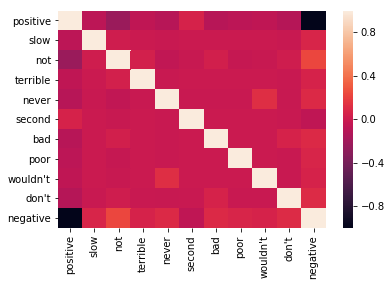

In [36]:
sns.heatmap(yelp_raw.corr())

In [37]:
data = yelp_raw[keywords]
target = yelp_raw['negative']

In [38]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], 
    (target !=y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 383


In [39]:
# Grab and process the raw data.
data_pathi = ("imdb_labelled.txt"
            )
imdb_raw = pd.read_csv(data_pathi, delimiter= '\t', header=None)
imdb_raw.columns = ['review', 'positive']

In [40]:
imdb_raw.head()

,review,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [41]:
imdb_raw['negative'] = np.where(imdb_raw['positive'] == 0, True, False)

In [42]:
imdb_raw.head()

,review,positive,negative
0,"A very, very, very slow-moving, aimless movie ...",0,True
1,Not sure who was more lost - the flat characte...,0,True
2,Attempting artiness with black & white and cle...,0,True
3,Very little music or anything to speak of.,0,True
4,The best scene in the movie was when Gerardo i...,1,False


In [45]:
keywords = ["slow", "not", "terrible", "never","second", "bad", "poor", "wouldn't", "don't"]

for key in keywords:
        #add spaces aroung the key so we're getting the word and not just pattern matching??
        imdb_raw[str(key)] = imdb_raw.review.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )

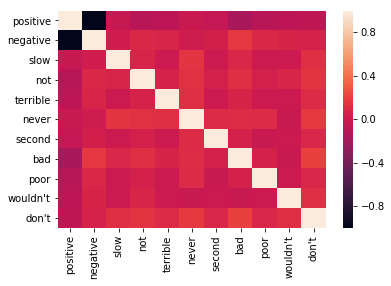

In [46]:
sns.heatmap(imdb_raw.corr())

In [47]:
datai = imdb_raw[keywords]
targeti = imdb_raw['negative']

In [48]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(datai, targeti)

y_pred = bnb.predict(datai)

print("Number of mislabeled points out of a total {} points : {}".format(
    datai.shape[0], 
    (targeti !=y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 308
